In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gini_index(p):
    return -2*x*x+x*2

In [3]:
x= np.linspace(0,1,200)

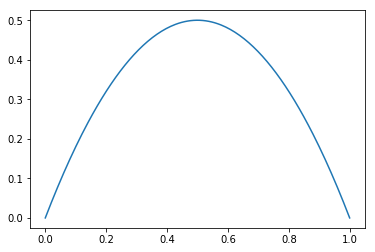

In [5]:
plt.plot(x,Gini_index(x))
plt.show()

### 基尼系数

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2,criterion='gini')
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
def plot_decision_boundary(model,axis):
    #model 是我们的模型    axis  是我们的坐标范围
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

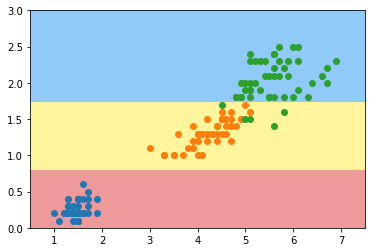

In [25]:
plot_decision_boundary(dt_clf,[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

## 模拟使用基尼系数进行划分

In [51]:
# 进行划分
# d 代表的某个节点的维度
# value 代表 这个维度上的阈值
# 用来划分
def split(X,y,d,value):
    # 分成左边和右边
    index_a = (X[:,d]<=value)  # 找出在d这个维度上的阈值小于value的所有的值
    index_b = (X[:,d]>value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [70]:
from collections import Counter
# 定义基尼系数
def gini_index1(y):
    counter = Counter(y)
    res = 1.0 # 初始的基尼系数
    for num in counter.values():  # dict_values([50, 50, 50])
        p = num / len(y)
        res -= p*p
        return res
            

In [71]:

# 具体的寻找d 和 value的值
def try_split(X,y):
    # 每一次尝试对 X，和y进行划分，找出一种划分使得得出的结果的信息熵是最低的
    # 首先初始化
    best_g = float('inf')  # 最大值
    best_d,best_v = -1,-1  # 随便初始化
    
    # 进行穷举,对维度
    for d in range(X.shape[1]):
        # 对维度上的阈值进行划分，对于这些阈值可选的值是每两个样本点，在d这个维度上中间的那个值 
        # 对在 X值在d这个维度上进行排序
        sorted_index =  np.argsort(X[:,d]) 
        # 遍历所有的样本  从1 开始而不是从0 开始 就是想找相邻的两个数据点他们在d这个维度上
        # 那个中间的值是多少  所以每次找的是i-1 和 i 这两个维度
        for i in range(1,len(X)):
            # 我们这两个值不能相等  如果相等 就没什么用了
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d]+X[sorted_index[i],d]) / 2
                # 现在进行划分 左子树 和右子树
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                g = gini_index1(y_l)+gini_index1(y_r)
                if g<best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v

In [72]:
best_entropy,best_d,best_v = try_split(X,y)
print(best_entropy)
print(best_d)
print(best_v)

0.75
0
2.45


In [73]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)
# 看一下 第一类的信息熵
gini_index(y1_l)

0.0

In [74]:
gini_index1(y1_r)

0.75

In [80]:
# 继续进行划分  对右边
best_entropy2,best_d2,best_v2 = try_split(X1_r,y1_r)
print(best_entropy2)
print(best_d2)
print(best_v2)

0.42607897153351704
0
5.15


In [83]:
X2_l,X2_r,y2_l,y2_r = split(X1_r,y1_r,best_d2,best_v2)


In [88]:
# 看一下 第一类的信息熵
gini_index1(y2_r)

0.0

In [89]:
gini_index1(y2_l)

0.42607897153351704

In [87]:
# 继续进行划分  对右边
best_entropy2,best_d2,best_v2 = try_split(X2_l,y2_l)
print(best_entropy2)
print(best_d2)
print(best_v2)

0.2568370986920334
1
1.85


In [91]:
X2_l,X2_r,y2_l,y2_r = split(X2_l,y2_l,best_d2,best_v2)
gini_index1(y2_r)


In [92]:
gini_index1(y2_l)

0.2568370986920334

In [69]:
X.shape
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [28]:
counter = Counter(y)
counter.values()

dict_values([50, 50, 50])